## Import libraries

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocess train data

## Load data

In [188]:
df_train = pd.read_csv('../data/raw/train.csv')

## Inspect data

In [189]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
print("shape:", df_train.shape)

shape: (891, 12)


In [191]:
print('info: ', df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
info:  None


In [192]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [193]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data type of each column

In [194]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Number of missing values

In [195]:
missing_values = df_train.isnull().sum().sort_values(ascending=False)
print(missing_values)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


## Key points
- The columns 'Age' and 'Cabin' contains more null values
- 'PassengerId', 'Name' and 'Ticket' doesn't affect 'Survived'. So, we can remove it from the data
- We can remove 'Cabin' from the training data, as there are a lot of missing values in it, 
- 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare' doesn't have any missing values
- We can also create new variable like FamilySize and IsAlone



## Find Duplicates

In [196]:
print(f'Duplicates: {df_train.duplicated().sum()}')

Duplicates: 0


## Extreme Values

In [197]:
df_train.max(numeric_only=True)

PassengerId    891.0000
Survived         1.0000
Pclass           3.0000
Age             80.0000
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

In [198]:
df_train.min(numeric_only=True)

PassengerId    1.00
Survived       0.00
Pclass         1.00
Age            0.42
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64

## Visualization of 'Survived' 

In [199]:
df_train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

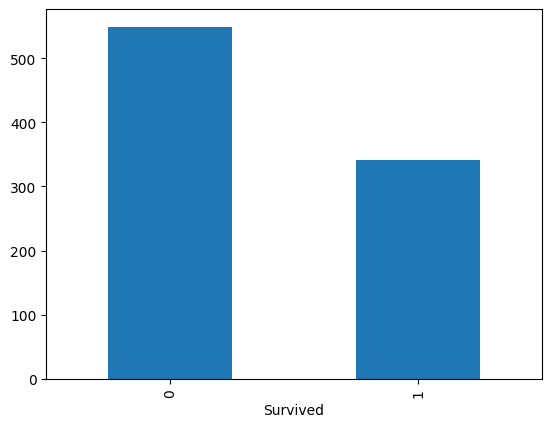

In [200]:
plt = df_train.Survived.value_counts().plot(kind='bar')

## Insight
- majority of passengers couldn't survive.

# Visualization of PClass

Text(4.444444444444452, 0.5, 'Passenger count')

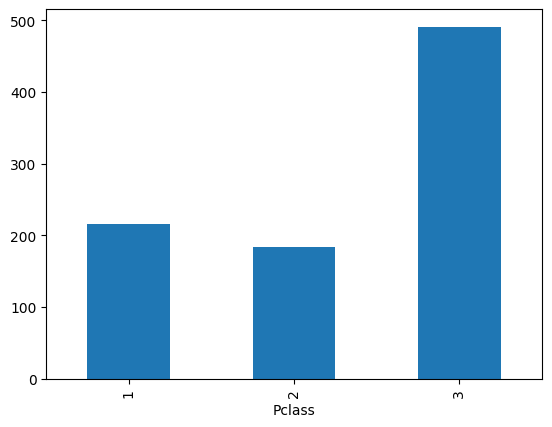

In [201]:
df_train.Pclass.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Passenger count')

In [202]:
df_train[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [203]:
df_train[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


Text(0, 0.5, 'Survival rate')

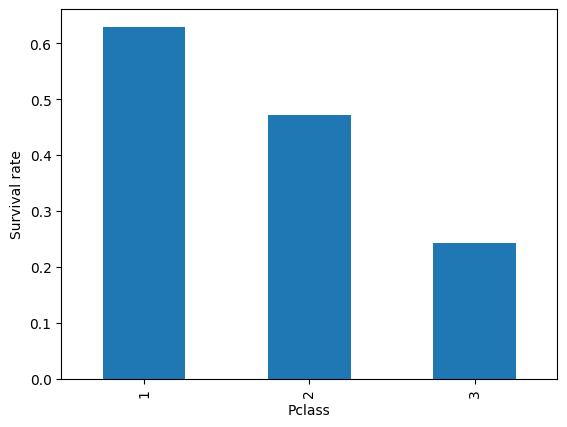

In [204]:
plt = df_train[['Pclass', 'Survived']].groupby('Pclass')['Survived'].mean().plot(kind='bar') # Survival rate mean = sum / count
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival rate')

### Insight
- 1st class has high chance of surviving than the other two

## Sex

Text(0, 0.5, 'Passenger count')

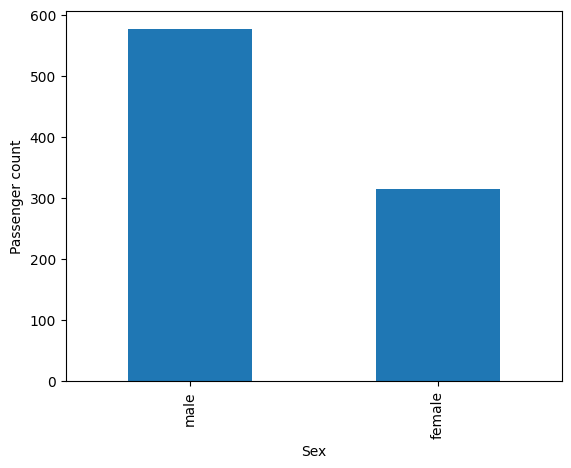

In [205]:
plt = df_train.Sex.value_counts().plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger count')

### Sex - Survival probability

Text(0, 0.5, 'Survival Probability')

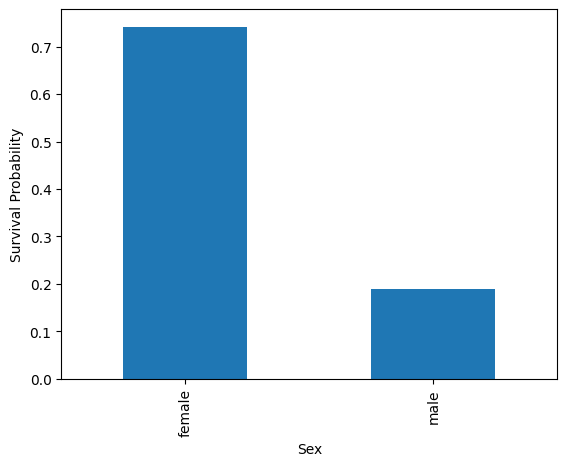

In [206]:
plt = df_train[['Sex', 'Survived']].groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

### Insight
-  The survival probaility for Female is more

## Embarked

Text(0, 0.5, 'Passenger count')

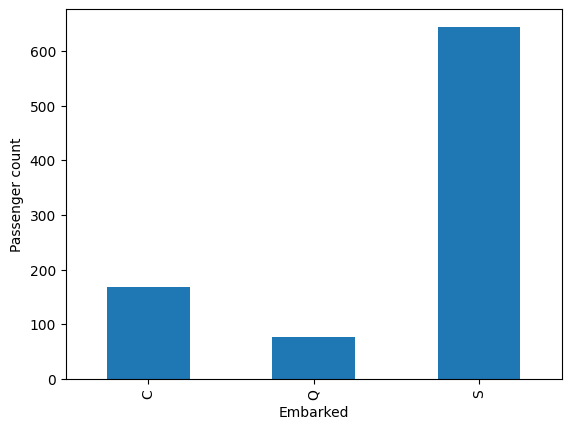

In [207]:
plt = df_train.Embarked.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Passenger count')

- Most of them are from Southampton(S).

## Embarked - Survival probability

Text(0, 0.5, 'Survival Probability')

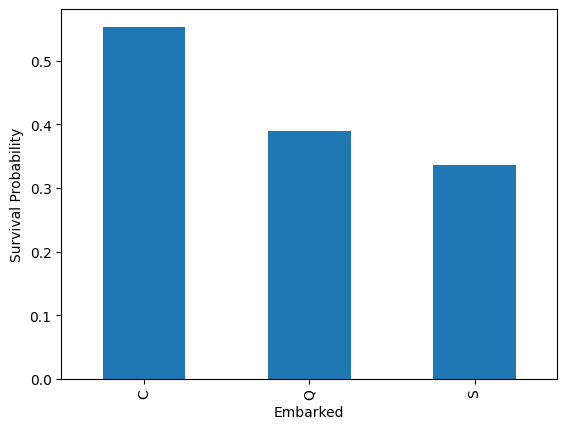

In [208]:
plt = df_train[['Embarked', 'Survived']].groupby('Embarked')['Survived'].mean().plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')


## SibSp - Siblings/Spouse

Text(0, 0.5, 'Passenger count')

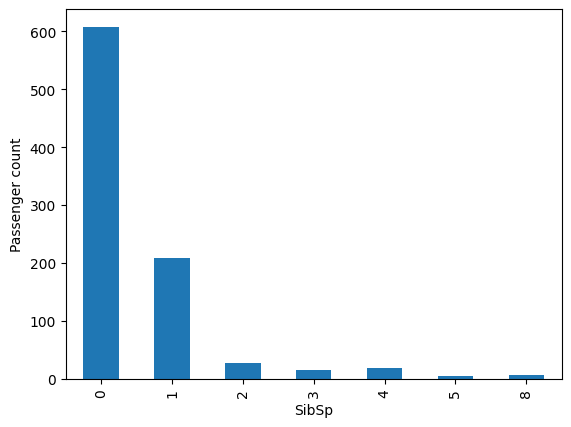

In [209]:
plt = df_train.SibSp.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

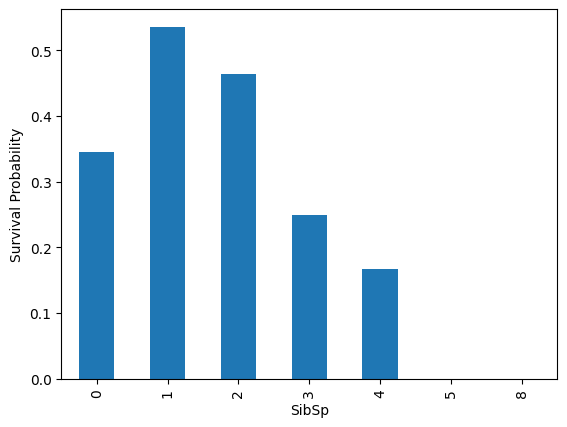

In [210]:
plt = df_train[['SibSp', 'Survived']].groupby('SibSp')['Survived'].mean().plot(kind='bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Survival Probability')

### Insight
- The passengers with 1 or 2 sibling has more survival probability.

### Parch - Children/Parents

Text(0, 0.5, 'Passenger count')

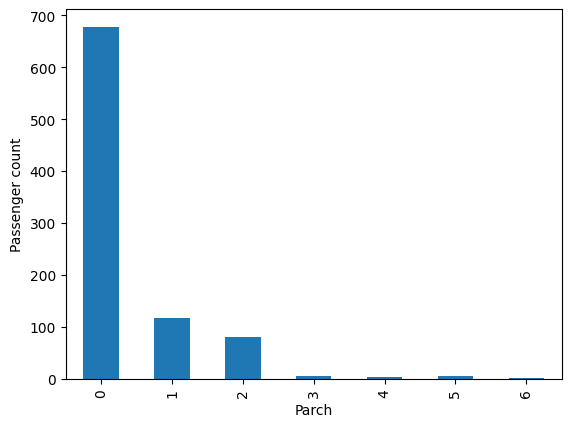

In [211]:
plt = df_train.Parch.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

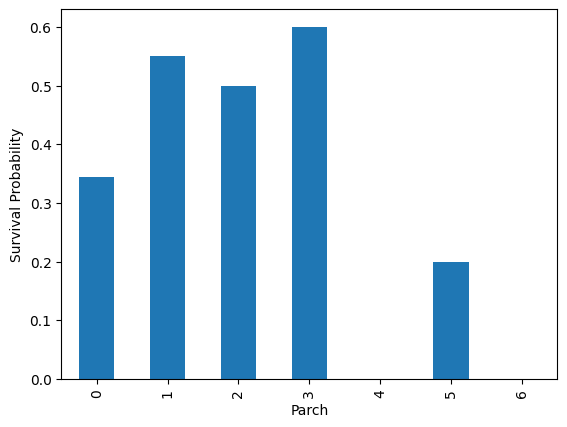

In [212]:
plt = df_train[['Parch', 'Survived']].groupby('Parch')['Survived'].mean().plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')

### Insight
- Passenger having 3 children has more survival probability

### Embarked vs Pclass

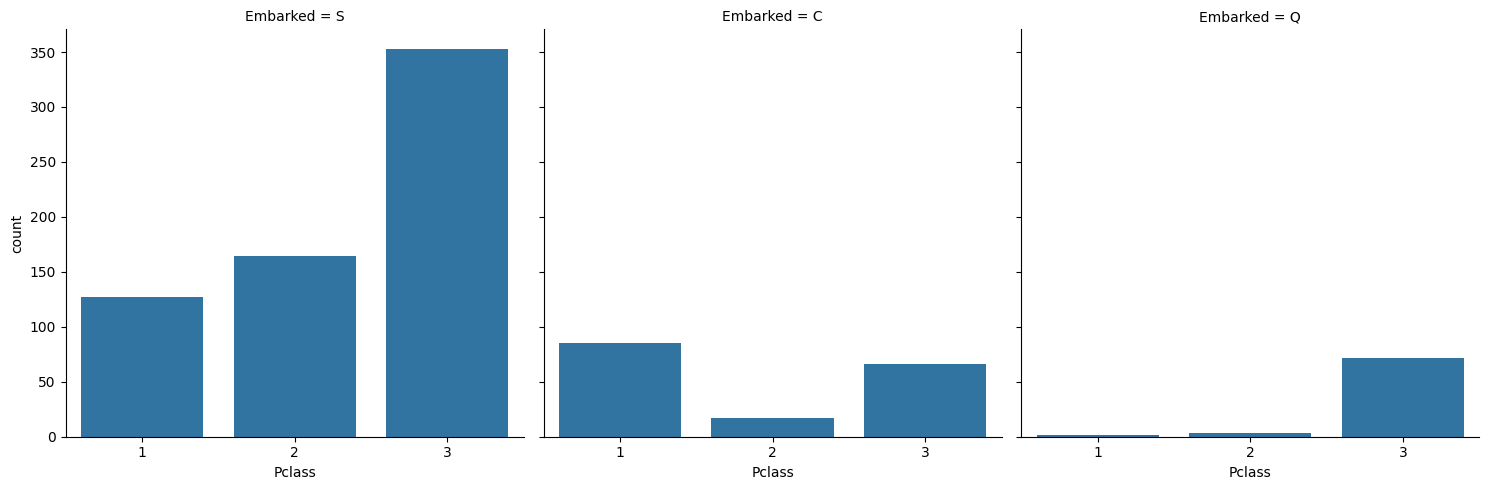

In [213]:
sns.catplot(x='Pclass', col='Embarked', data=df_train, kind='count')

### Pclass vs Sex

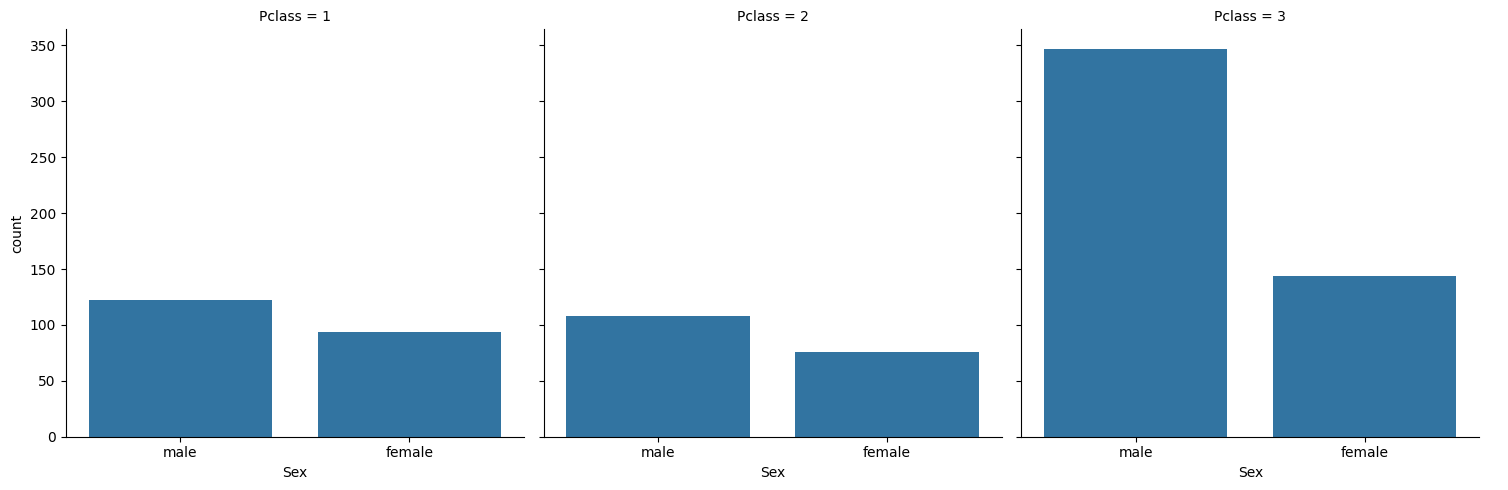

In [214]:
sns.catplot(x='Sex', col='Pclass', data=df_train, kind='count')

### Embarked vs Sex

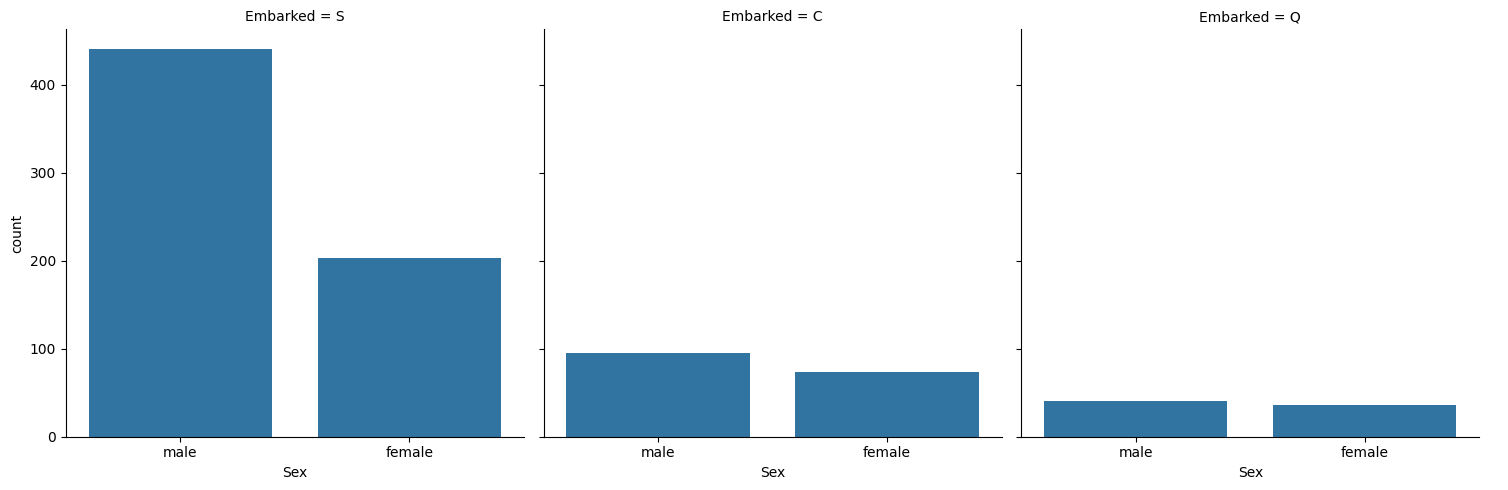

In [215]:
sns.catplot(x='Sex', col='Embarked', data=df_train, kind='count')

## Remove unnecessary columns

- We can remove 'Ticket' and 'PassengerId', as they don't contribute 
- Remove 'Cabin' as it has a lot of missing values 

In [216]:
df_train = df_train.drop(columns=['Ticket', 'PassengerId', 'Cabin'])
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Binary encoding Sex

In [217]:
df_train['Sex'] = df_train['Sex'].map({'male':0, 'female':1})

## Handle missing values

### Handle missing 'Embarked' values
- The two missing values in 'Embarked' will be replaced by the majority class which is 'S', in order to keep the orginal distribution.

In [218]:
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


## One-hot encoding Embarked

In [219]:
df_train["Embarked"] = df_train["Embarked"].map({"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"})
df_train = pd.get_dummies(df_train, columns=["Embarked"], prefix="", prefix_sep="", dtype=int, drop_first=True)

df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Queenstown,Southampton
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1


### Age : Use correlation
- close to 0 - little or no correlation

In [220]:
df_train[["Age", "Fare", "Sex", "SibSp", "Parch", "Pclass", "Survived"]].corr()

,Age,Fare,Sex,SibSp,Parch,Pclass,Survived
Age,1.000000,0.096067,-0.093254,-0.308247,-0.189119,-0.369226,-0.077221
Fare,0.096067,1.000000,0.182333,0.159651,0.216225,-0.549500,0.257307
Sex,-0.093254,0.182333,1.000000,0.114631,0.245489,-0.131900,0.543351
SibSp,-0.308247,0.159651,0.114631,1.000000,0.414838,0.083081,-0.035322
Parch,-0.189119,0.216225,0.245489,0.414838,1.000000,0.018443,0.081629
Pclass,-0.369226,-0.549500,-0.131900,0.083081,0.018443,1.000000,-0.338481
Survived,-0.077221,0.257307,0.543351,-0.035322,0.081629,-0.338481,1.000000


### Insight
Age ↔ Survived: –0.0505 → Very weak

Age ↔ Sex: –0.091 → Very weak

Age ↔ Fare: 0.11 → Very weak

Age ↔ SibSp: –0.310355 → Moderate

Age ↔ Pclass: –0.402251 → Moderate

Age ↔ Parch: –0.187 → Weak–moderate


### Fill with median

In [221]:
df_train["Age"] = df_train["Age"].fillna(df_train.groupby(["Pclass", "SibSp", "Parch"])["Age"].transform("median"))
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].median())  

In [222]:
df_train.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Queenstown     0
Southampton    0
dtype: int64

## Add Feature Engineering

### AgeGroup binning

In [223]:
df_train['Age'].min()

0.42

In [224]:
df_train['Age'].max()

80.0

In [225]:
df_train['AgeGroup'] = pd.cut(
  df_train['Age'], 
  bins=[0, 12, 18, 35, 60, 80], 
  labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
  )

In [226]:
df_train['AgeGroup'].value_counts()

AgeGroup
Young Adult    499
Adult          225
Child           73
Teen            72
Senior          22
Name: count, dtype: int64

### AgeGroup vs Survived

/var/folders/4f/59fr4bzd2knfw4c7yhb7m99c0000gn/T/ipykernel_24618/4182747694.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='AgeGroup', ylabel='Survived'>

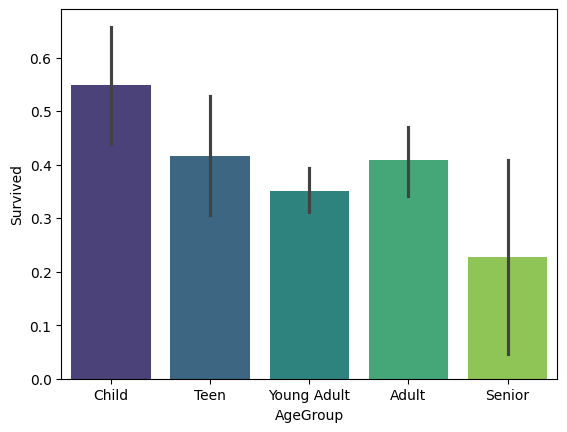

In [227]:
sns.barplot(
    x="AgeGroup",
    y="Survived",
    data=df_train,
    palette="viridis"
)

## FamilySize

In [228]:
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_train['FamilySize'].value_counts()

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

## FamilyGroup vs Survival

/var/folders/4f/59fr4bzd2knfw4c7yhb7m99c0000gn/T/ipykernel_24618/4160778663.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='FamilySize', ylabel='Survived'>

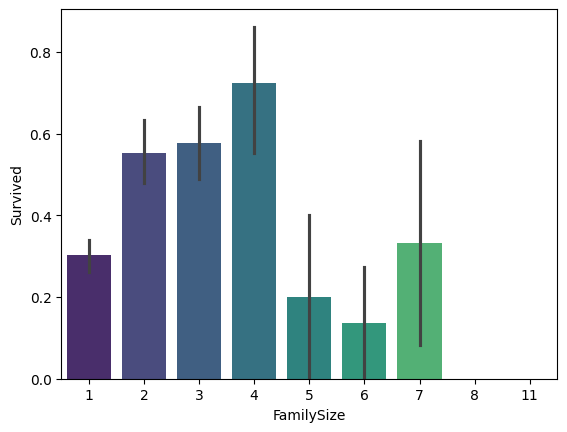

In [229]:
sns.barplot(
    x="FamilySize",
    y="Survived",
    data=df_train,
    palette="viridis"
)

## isAlone

In [230]:
df_train["isAlone"] = (df_train["FamilySize"] == 1).astype(int)
df_train["isAlone"].value_counts()

isAlone
1    537
0    354
Name: count, dtype: int64

## isAlone vs Survival

/var/folders/4f/59fr4bzd2knfw4c7yhb7m99c0000gn/T/ipykernel_24618/1952856464.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='isAlone', ylabel='Survived'>

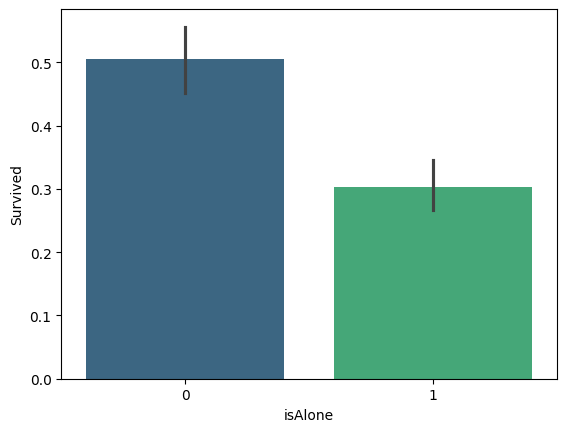

In [231]:
sns.barplot(
    x="isAlone",
    y="Survived",
    data=df_train,
    palette="viridis"
)

### Extract Title and drop Name

In [232]:
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_train = df_train.drop(columns='Name')

<Axes: xlabel='Title'>

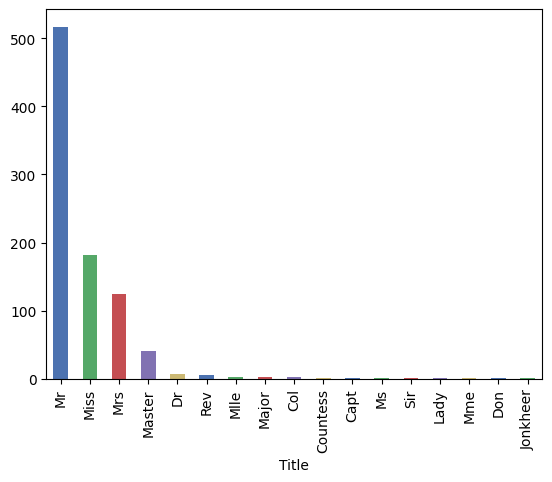

In [233]:
df_train["Title"].value_counts().plot(
    kind="bar",
    color=["#4C72B0", "#55A868", "#C44E52", "#8172B2", "#CCB974"]
)


In [234]:
df_train['Title'] = df_train['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')

Text(0, 0.5, 'Passenger count')

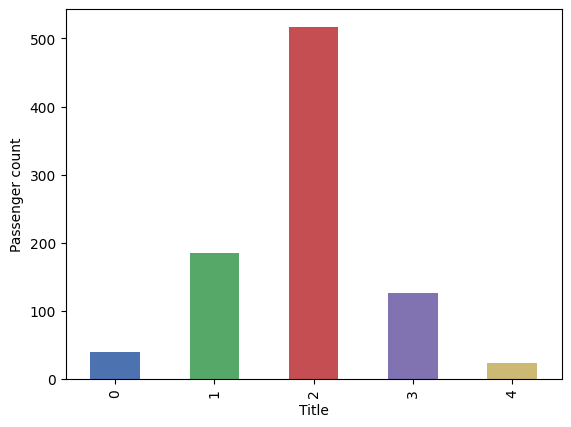

In [255]:
plt = df_train.Title.value_counts().sort_index().plot(kind='bar', color=["#4C72B0", "#55A868", "#C44E52", "#8172B2", "#CCB974"])
plt.set_xlabel('Title')
plt.set_ylabel('Passenger count')

## Title vs Survived

Text(0, 0.5, 'Survival Probability')

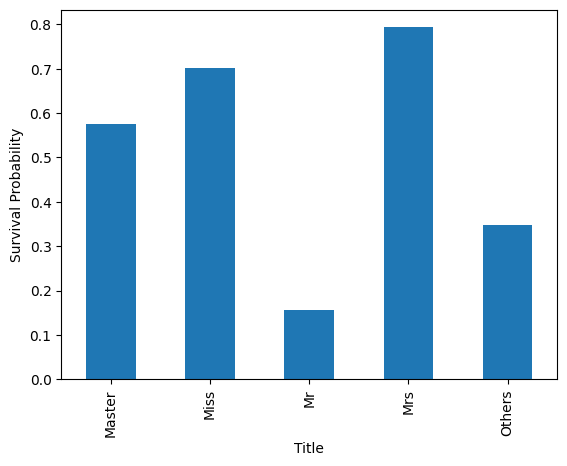

In [236]:
plt = df_train[['Title', 'Survived']].groupby('Title')['Survived'].mean().plot(kind='bar')
plt.set_xlabel('Title')
plt.set_ylabel('Survival Probability')

### Insight
- The survival probability for 'Mrs' and 'Miss' is high

## Title to numerical value

In [237]:
df_train['Title'] = df_train['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Queenstown,Southampton,AgeGroup,FamilySize,isAlone,Title
0,0,3,0,22.0,1,0,7.2500,0,1,Young Adult,2,0,2
1,1,1,1,38.0,1,0,71.2833,0,0,Adult,2,0,3
2,1,3,1,26.0,0,0,7.9250,0,1,Young Adult,1,1,1
3,1,1,1,35.0,1,0,53.1000,0,1,Young Adult,2,0,3
4,0,3,0,35.0,0,0,8.0500,0,1,Young Adult,1,1,2


In [238]:
df_train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Queenstown     0
Southampton    0
AgeGroup       0
FamilySize     0
isAlone        0
Title          0
dtype: int64

## Preprocess test data

In [239]:
df_test = pd.read_csv('../data/raw/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [240]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Remove column and Extract Title

In [241]:
df_test = df_test.drop(columns=['Ticket', 'PassengerId', 'Cabin'])
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_test = df_test.drop(columns='Name')

df_test['Title'] = df_test['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')

#convert to Numerical values.
df_test['Title'] = df_test['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

### Convert 'Sex' and 'Embarked' to Numerical values

In [242]:
df_test['Sex'] = df_test['Sex'].map({'male':0, 'female':1})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [243]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        1
dtype: int64

In [244]:
df_test["Age"] = df_train["Age"].fillna(df_train.groupby(["Pclass", "SibSp", "Parch"])["Age"].transform("median"))
df_test.Title = df_test.Title.fillna(df_train.Title.mode()[0])
df_test.Fare = df_test.Fare.fillna(df_train.Fare.mean())

In [245]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

## Create Family Size and IsAlone

In [246]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test['IsAlone'] = (df_test['FamilySize'] == 1).astype(int)

In [247]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,3,0,22.0,0,0,7.8292,1,2.0,1,1
1,3,1,38.0,1,0,7.0000,2,3.0,2,0
2,2,0,26.0,0,0,9.6875,1,2.0,1,1
3,3,0,35.0,0,0,8.6625,2,2.0,1,1
4,3,1,35.0,1,1,12.2875,2,3.0,3,0


## Split 'train data' and 'test data'

In [248]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns="Survived")
y= df_train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Preprocessed Data

In [249]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Queenstown,Southampton,AgeGroup,FamilySize,isAlone,Title
331,1,0,45.5,0,0,28.5000,0,1,Adult,1,1,2
733,2,0,23.0,0,0,13.0000,0,1,Young Adult,1,1,2
382,3,0,32.0,0,0,7.9250,0,1,Young Adult,1,1,2
704,3,0,26.0,1,0,7.8542,0,1,Young Adult,2,0,2
813,3,1,6.0,4,2,31.2750,0,1,Child,7,0,1


In [250]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [251]:
X_train.shape

(712, 12)

In [252]:
y_train.shape

(712,)

In [253]:
X_test.shape

(179, 12)

In [254]:
y_test.shape

(179,)